<a href="https://colab.research.google.com/github/sscreates/brain_machin3_interface/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**C H A P T E R 11**

###**T I T L E**
Fourier Transform

###**A B S T R A C T**
The chapter encompasses the concept of Fourier decomposition, right from the introduction to the variations and then flows into defining what a Fourier transform looks like. Followed by complex Fouier transform and how the value of N affects its computation. The chapter also discusses what fast fourier transform is and its benefits. Next, the chapter discusses what an inverse dft is and what is the Nyquist limit. The chapter also talks about how we can extract magnitudes of these frequencies and the phase angles as they represent more information about the signal being processed. The chapter ends with a project that allows the learner to practice fft on various voice samples.

---

###**I N T R O D U C T I O N**
Fourier transform is used to convet information from the time domain to the frequency domain. This eventually helps us to know what frequencies are present in a sound file and eventually analyze the data in the sound file. Every sound file has particular characteristics owing to the various syllables, tones, context, meaning that changes the pitch of the sound files. Fourier transform helps in recognizing these frequencies (as it works in the frequency domain) and thus we analyze the sound file. The fourier transofrm takes in function in the time domain and converts it into frequency domain by representing it with a non-oscillatory component and sum of integration of sin and cosine functions of the signal multiplied by the relative strengths of the frequencies. This is a real fourier transform. The limits of the inegration go from 1 to infinity.

###**M E T H O D S**
The first method is the **real fourier transform** where the input is a real valued time signal with amplitude and frequencies in the real values too. It is basically decomposed into a series of cosine functions and has only real values. It is also symmetric owing to the nature of distribution of the positive and negative values over the frequency domain.

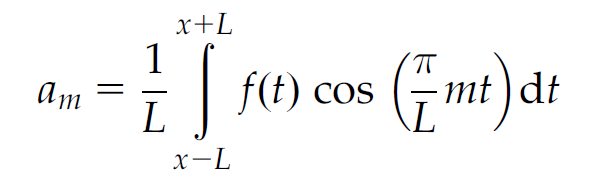

In [ ]:
#Exercise 11.1
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

t_start = 0
t_end = 5
sampling_rate = 1000
freq1 = 5
t = np.linspace(t_start, t_end, sampling_rate)
signal = np.sin(2 * np.pi * freq1 * t)

#shifting the interval
t_start_new = -0.5
t_shifted = t - (t_start - t_start_new)
shift_signal = np.interp(t_shifted, t, signal)

#applyingtransform
frequency_domain = np.fft.fft(shift_signal)
freq = np.fft.fftfreq(len(frequency_domain), d=0.01)

phases = np.angle(frequency_domain)
#print(phases)

plt.subplot(121)
plt.plot(t_shifted, shift_signal)
plt.title("Shifted Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(122)
plt.plot(freq, np.abs(frequency_domain))
plt.title("Magnitude of Fourier Transform")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

Second method is the **complex fourier transform** which is a mathematically precise way of doing the transform. It takes in a signal having complex values. Thus the frquency domain will also have the phase change information along with the magnitudes and thus gives a better transform as it captures the full complexity of the signal.

THe discrete fourier transform is mathematical function that deals with discrete signals nd thus is used for processing digital signals. The input differs from the one the real or complex fourier transform takes in.(Demonstrated in exercise 11.2)

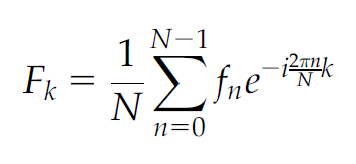

In [ ]:
#Exercise 11.2: performing dft

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

#signal = np.array([1.0, 2.0, 3.0, 4.0])
t_start = 0
t_end = 5
sampling_rate = 100
freq2 = 3
t2 = np.linspace(t_start, t_end, int(sampling_rate * (t_end-t_start)), endpoint=False)
signal = np.sin(2 * np.pi * freq2 * t2)
signal_decomp = np.fft.fft(signal)

n = len(signal)
sampling_rate = 1.0
frequencies = np.fft.fftfreq(n, d=1.0/sampling_rate)

magnitudes = np.abs(signal_decomp)
phases = np.angle(signal_decomp)


#print(complex_spectrum)
plt.subplot(121)
plt.plot(t2, signal)
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(122)
plt.plot(frequencies, np.abs(signal_decomp))
plt.title("Transform")
plt.xlabel("Frequencies")
plt.ylabel("Magnitudes")

plt.tight_layout()
plt.show()

Third method is the fast fourier transform that applies to data sets that are 2^N times, thus scaling to NlogN times. This makes it quicker. The size of the sample (length of the signal being analyzed) ie N afects the scaling of the frequency domain and thus affects the output. Higher the value of N, greater the resolution of the frequency and more information on the signal. But at the same time might lose soe discrete changes in the frequency. (Discussed in exercise 11.3)

The amplitudes and phase angles can be retrieved from the frequency domain. These can be plotted across the time and frequencies and visualized using matplotlib.pyplot libraries.

All the fourier transfors can be done using these libraries ie numpy and matplotlib.pylot. These help in using and extracting frequencies, phase angles, magnitudes, adn then plot them. fft() is the function used for doing the transform that takes the signal and

#Exercise 11.3

Sampling frequency of sample size 0-N

The value of N corresponds to the length of the signal being analyzed. The bigger the value of N, the longer the snippet of signal. As the value of N increases, the resolution of the frequency increases as well because of the integration over the interval. This means that we get more information about the signal but might miss some precise changes between adjacent frequencies. So there is always going to be a trade-off between a larger value for better overall analysis or smaller value for better precision.


In [ ]:
#Exercise 11.4

import numpy as np
import matplotlib.pyplot as plt

duration = 5
frequency = 5
smpl_rate = 1000
amp = 2

t = np.linspace(0, duration, int(smpl_rate * duration))
sinewave = amp * np.sin(2*np.pi*frequency*t)

fft_result = np.fft.fft(sinewave)
frequencies = np.fft.fftfreq(len(fft_result), d=1/smpl_rate)

print(frequencies)

orig_wave = np.fft.ifft(fft_result)

phase1 = np.angle(fft_result)
print(phase1)

plt.figure(figsize=(10, 6))
plt.subplot(231)
plt.plot(t, sinewave)
plt.xlabel("seconds")
plt.ylabel("amplitude")
plt.title("sinewave")

plt.subplot(232)
plt.plot(frequencies, np.abs(fft_result))
plt.title("frequency spectrum")
plt.xlabel("frequency")
plt.ylabel("magnitude")
plt.grid(True)

plt.subplot(233)
plt.plot(t, orig_wave)
plt.xlabel("seconds")
plt.ylabel("amplitude")
plt.title("retrieved sinewave")

plt.show

###**D I S C U S S I O N S**
Nyquist limit is a theoretical limit which gives us the value where the fft return values will end. It is spaced between 0 and half of the sampling frequency.


The amplitudes and phase angles can be retrieved from the frequency domain. These can be plotted across the time and frequencies and visualized using matplotlib.pyplot libraries. Magnitude is distance of the coordinate from the origin in the spectral space and phase is the angle from the abscssa and the line passing through origin and the point.

All the fourier transfors can be done using these libraries ie numpy and matplotlib.pylot. These help in using and extracting frequencies, phase angles, magnitudes, and then plot them. fft() is the function used for doing the transform that takes the signal and creates a series of frequencies for the signal. Depending on the quality and characteristics of the signal, the frequency domain looks different and this helps in undersanding the signal. linspace() is used to generate a linearly spaced

As we use fft() to extract the frequencies and ocnverting the signal to the fequency domain, we can use ift() to retrieve the origianl signal.

In [ ]:
#Exercise 11.5: Extracting phases and comparing power spectra
import numpy as np
import matplotlib.pyplot as plt

#exercise11.1data

t_start = 0
t_end = 5
sampling_rate = 1000
freq1 = 2
phase_shift = np.pi/3
t1 = np.linspace(t_start, t_end, sampling_rate)
t_start_new = -0.5
t_shifted = t1 - (t_start - t_start_new)
cos_signal1 = np.cos(2 * np.pi * freq1 * t1 + phase_shift)
shift_signal1 = np.interp(t_shifted, t1, cos_signal1)

fft_result1 = np.fft.fft(cos_signal1)

phase1 = np.angle(fft_result1)
phase_fft1 = np.angle(fft_result1)
phase_cos1 = np.angle(np.exp(1j * (2 * np.pi * freq1 * t1 + phase_shift)))

plt.figure(figsize=(10, 6))

plt.plot(t1, phase_fft1, label="FFT Phase Spectrum")
plt.plot(t1, phase_cos1, label="Analytical Phase Spectrum")
plt.title("Comparison of Phase Spectra")
plt.xlabel("Time (s)")
plt.ylabel("Phase Angle (radians)")
plt.legend()
plt.grid(True)
plt.show()

#comparison of power spectra
fft_magnitude1 = np.abs(fft_result1)
power_spectrum_fft1 = fft_magnitude1**2
squared_amplitude1 = np.cos(phase_shift)**2

plt.figure(figsize=(10, 6))
plt.plot(t1, power_spectrum_fft1, label="FFT Power Spectrum")
plt.axhline(y=squared_amplitude1, color='r', linestyle='--', label="Analytical Power Spectrum")
plt.title("Comparison of Power Spectra")
plt.xlabel("Time (s)")
plt.ylabel("Power")
plt.legend()
plt.grid(True)
plt.show()

#exercise11.2data
t_start = 0
t_end = 5
sampling_rate = 50
freq2 = 2
t2 = np.linspace(t_start, t_end, int(sampling_rate * (t_end-t_start)), endpoint=False)
n = len(signal)
sampling_rate = 1.0
cos_signal2 = np.cos(2 * np.pi * freq2 * t2 + phase_shift)

fft_result2 = np.fft.fft(cos_signal2)
frequencies = np.fft.fftfreq(n, d=1.0/sampling_rate)

phase2 = np.angle(cos_signal2)
phase_fft2 = np.angle(fft_result2)
phase_cos2 = np.angle(np.exp(1j * (2 * np.pi * freq1 * t2 + phase_shift)))

plt.figure(figsize=(10, 6))

plt.plot(t2, phase_fft2, label="FFT Phase Spectrum")
plt.plot(t2, phase_cos2, label="Analytical Phase Spectrum")
plt.title("Comparison of Phase Spectra")
plt.xlabel("Time (s)")
plt.ylabel("Phase Angle (radians)")
plt.legend()
plt.grid(True)
plt.show()

fft_magnitude2 = np.abs(fft_result2)
power_spectrum_fft2 = fft_magnitude2**2
squared_amplitude2 = np.cos(phase_shift)**2

plt.figure(figsize=(10, 6))
plt.plot(t2, power_spectrum_fft2, label="FFT Power Spectrum")
plt.axhline(y=squared_amplitude2, color='r', linestyle='--', label="Analytical Power Spectrum")
plt.title("Comparison of Power Spectra")
plt.xlabel("Time (s)")
plt.ylabel("Power")
plt.legend()
plt.grid(True)
plt.show()

#exercise11.4data
duration = 5
freq3 = 5
smpl_rate = 1000
amp = 2

t3 = np.linspace(0, duration, int(smpl_rate * duration))


cos_signal3 = np.cos(2 * np.pi * freq3 * t3 + phase_shift)
fft_result3 = np.fft.fft(cos_signal3)
frequencies = np.fft.fftfreq(len(fft_result3), d=1/smpl_rate)
phase3 = np.angle(fft_result3)
phase_fft3 = np.angle(fft_result3)
phase_cos3 = np.angle(np.exp(1j * (2 * np.pi * freq1 * t3 + phase_shift)))

plt.figure(figsize=(10, 6))

plt.plot(t3, phase_fft3, label="FFT Phase Spectrum")
plt.plot(t3, phase_cos3, label="Analytical Phase Spectrum")
plt.title("Comparison of Phase Spectra")
plt.xlabel("Time (s)")
plt.ylabel("Phase Angle (radians)")
plt.legend()
plt.grid(True)
plt.show()

fft_magnitude3 = np.abs(fft_result3)
power_spectrum_fft3 = fft_magnitude3**2
squared_amplitude3 = np.cos(phase_shift)**2

plt.figure(figsize=(10, 6))
plt.plot(t3, power_spectrum_fft3, label="FFT Power Spectrum")
plt.axhline(y=squared_amplitude3, color='r', linestyle='-.', label="Analytical Power Spectrum")
plt.title("Comparison of Power Spectra")
plt.xlabel("Time (s)")
plt.ylabel("Power")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!ls
from google.colab import files
uploaded = files.upload()

'i (1).wav'   i.wav   sample_data


Saving voice-sample-1.wav to voice-sample-1.wav


In [ ]:
#Project_draft

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile


sample_rate, sound_data = wavfile.read("voice-sample-1.wav")


signal_decompfft = np.fft.fft(sound_data)
frequencies4 = np.fft.fftfreq(len(signal_decompfft), d=1/sample_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequencies4, np.abs(signal_decompfft))
plt.title("Frequency Spectrum of Sound File")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(200, 2500)
plt.grid(True)
plt.show()


In [ ]:
#Project_finalfile

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

def fft(data):
 sample_rate, sound_data = wavfile.read(data)
 signal_fft = np.fft.fft(sound_data)
 frequencies = np.fft.fftfreq(len(signal_fft), d=1/sample_rate)
 plt.figure(figsize=(10, 6))
 plt.plot(frequencies, np.abs(signal_fft))
 plt.title("Frequency Spectrum of Sound File")
 plt.xlabel("Frequency (Hz)")
 plt.ylabel("Magnitude")
 plt.xlim(200, 2400)
 plt.grid(True)
 plt.show()




fft('voice-sample-1.wav')
fft('voice-sample-2.wav')
fft('voice-sample-3.wav')
fft('voice-sample-4.wav')
fft('voice-sample-5.wav')
fft('voice-sample-6.wav')
fft('voice-sample-7.wav')
fft('voice-sample-8.wav')
fft('voice-ah.wav')
fft('voice-oh.wav')
